In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as ts
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.api import qqplot

In [2]:
import os
os.getcwd()

'C:\\Users\\Gabriel\\Desktop\\analise_de_dados\\Series Temporais'

In [3]:
data = pd.read_excel ('Air.xls')
data.head()

,Mês,X
0,Jan,112
1,Fev,118
2,Mar,132
3,Abr,129
4,Mai,121


In [4]:
data.tail()

,Mês,X
139,Ago,606
140,Set,508
141,Out,461
142,Nov,390
143,Dez,432


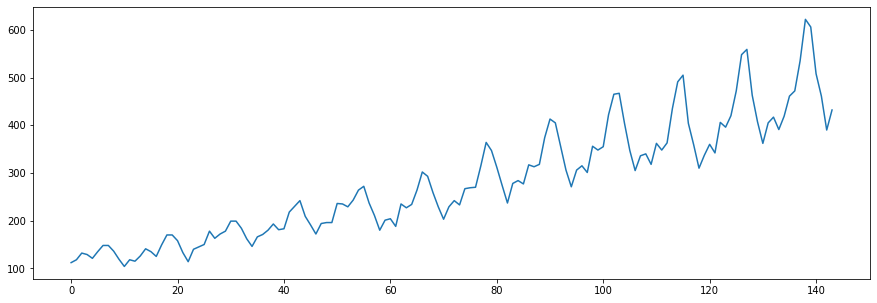

In [5]:
fig, axes = plt.subplots(figsize = (15, 5))
axes.plot(data['X'])

In [11]:
ACF, q, pq = ts.acf(data['X'], qstat=True, fft = False, nlags = 40)
PACF = ts.pacf(data['X'], nlags = 40)
tabela = np.c_[range(1,41), ACF[1:], PACF[1:], q, pq]
tabela = pd.DataFrame(tabela, columns=['lag', "ACF", "PACF", "Q", "Prob(>Q)"])
tabela.head(10)

,lag,ACF,PACF,Q,Prob(>Q)
0,1.0,0.948047,0.954677,132.141539,1.393231e-30
1,2.0,0.875575,-0.265277,245.646160,4.556318e-54
2,3.0,0.806681,0.055470,342.674826,5.751088e-74
3,4.0,0.752625,0.108856,427.738684,2.817731e-91
4,5.0,0.713770,0.081126,504.796570,7.360195e-107
5,6.0,0.681734,0.004125,575.601854,4.264008e-121
6,7.0,0.662904,0.156170,643.038593,1.305463e-134
7,8.0,0.655610,0.103708,709.484498,6.496271e-148
8,9.0,0.670948,0.288781,779.591231,5.249370e-162
9,10.0,0.702720,0.206918,857.068639,1.100789e-177


C:\Users\Gabriel\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


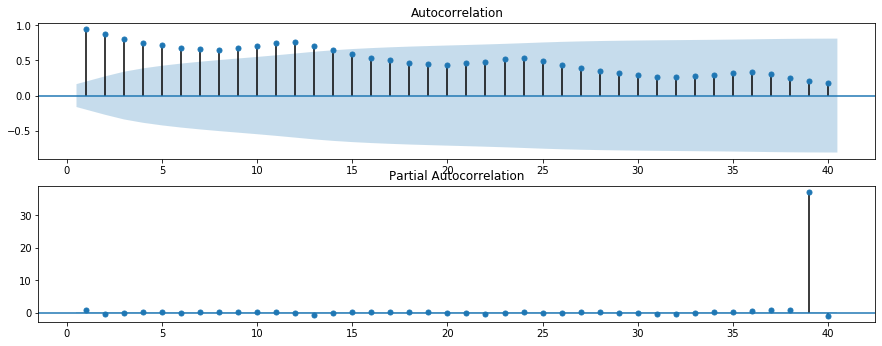

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))
fig = plot_acf(data['X'], lags=40, zero=False, ax=ax1)

fig = plot_pacf(data['X'], lags=40, zero=False, ax=ax2)